# Lab 13 Analyzing Covid19

![JMU Logo](https://jmusports.com/images/2020/7/7/JMU.png?width=2000)

COVID-19, flu (influenza), and RSV (Respiratory Syncytial Virus) are all contagious respiratory illnesses but are caused by different viruses.

Data source: [Centers for Disease Prevention and Control](https://www.cdc.gov/coronavirus/2019-ncov/index.html)

Author:
Email:

## Import Data

In [1]:
%matplotlib inline
import pandas as pd

In [2]:
!pip install xlrd

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 5.3 MB/s eta 0:00:00


In [4]:
df=pd.read_excel('s3://wingrove-241-2023-python/covid_data.xls')
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12 00:00:00,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-11-12 00:00:00,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-10-12 00:00:00,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658


## Number of Cases Per Day

<AxesSubplot: xlabel='dateRep'>

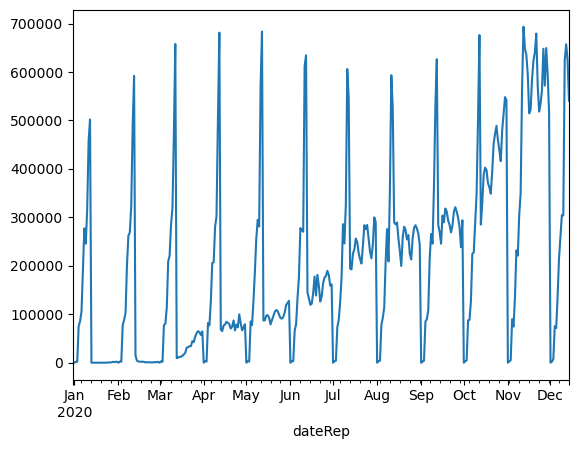

In [8]:
df['dateRep']=pd.to_datetime(df['dateRep']) #convert to date format
dayfirst=False
sum_death_by_date=df.groupby('dateRep')['cases'].sum()
sum_death_by_date.plot()

## Top Countries with Highest Covid Rates

<AxesSubplot: xlabel='countriesAndTerritories'>

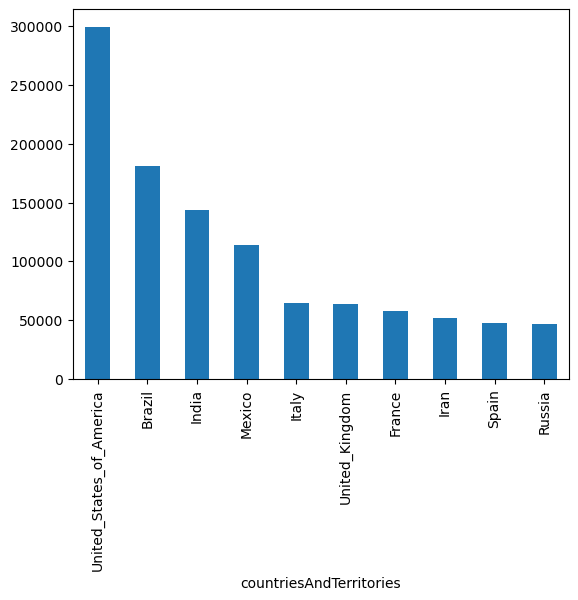

In [9]:
sum_death_by_country = df.groupby('countriesAndTerritories')['deaths'].sum()
sum_death_by_country.nlargest(10).plot.bar()

USA, Brzil and India are the top 3 countries with the highest deaths.

## All Countries and Territories Included

In [15]:
pd.unique(df['countriesAndTerritories'])

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia',
       'Cuba', 'CuraÃ§ao', 'Cyprus', 'Czechia',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Er

## UK Data

In [24]:
uk_data = df.loc[df['countriesAndTerritories'] == 'United_Kingdom']
uk_data.head(120) #the top 5 rows

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
58378,2020-12-14,14,12,2020,18447,144,United_Kingdom,UK,GBR,66647112.0,Europe,348.216139
58379,2020-12-13,13,12,2020,21501,520,United_Kingdom,UK,GBR,66647112.0,Europe,338.775370
58380,2020-12-12,12,12,2020,21672,424,United_Kingdom,UK,GBR,66647112.0,Europe,330.327892
58381,2020-11-12,11,12,2020,20964,516,United_Kingdom,UK,GBR,66647112.0,Europe,319.925341
58382,2020-10-12,10,12,2020,16578,533,United_Kingdom,UK,GBR,66647112.0,Europe,314.810340
...,...,...,...,...,...,...,...,...,...,...,...,...
58493,2020-08-21,21,8,2020,1182,6,United_Kingdom,UK,GBR,66647112.0,Europe,21.225226
58494,2020-08-20,20,8,2020,812,16,United_Kingdom,UK,GBR,66647112.0,Europe,20.877124
58495,2020-08-19,19,8,2020,1089,12,United_Kingdom,UK,GBR,66647112.0,Europe,20.995658
58496,2020-08-18,18,8,2020,713,3,United_Kingdom,UK,GBR,66647112.0,Europe,20.366974


## Scatterplot Covid and Case and Death Rates by Month in the UK

<AxesSubplot: xlabel='cases', ylabel='deaths'>

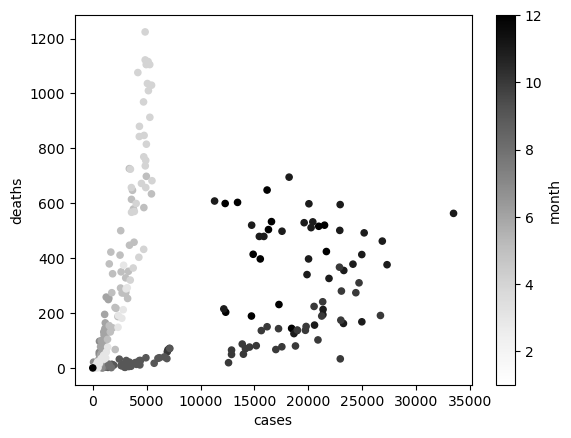

In [25]:
uk_data.plot.scatter(x='cases',y='deaths',c= 'month')

Higher death rate in earlier months, and lower deather rate in later months